In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import transformers

In [3]:
# read the csv file
df = pd.read_csv('/content/drive/MyDrive/data/sdp2022/task1_train_dataset.csv')
  
# display dataset
print(df)

       index                                              title  \
0          0  Activation of nitrofurazone by azoreductases: ...   
1          1  Organisation and delivery of home care re-able...   
2          2  Relationships between anthocyanins and other c...   
3          3  New Insights into the Mechanisms of Water-Stre...   
4          4  Extensive chordate and annelid macrosynteny re...   
...      ...                                                ...   
51555  51555  BALB/c mice deficient in CD4(+) T cell IL-4R a...   
51556  51556         The Afterlife of Parliamentary Sovereignty   
51557  51557  Metabolomic Proﬁling of In Vivo Plasma Respons...   
51558  51558  Constant flux relation for diffusion-limited c...   
51559  51559  Sequence determinants for the tandem recogniti...   

            first_author                                        description  \
0            M Nakanishi                                                NaN   
1                  Allen             

In [4]:
df = df[['title','theme']]
df

,title,theme
0,Activation of nitrofurazone by azoreductases: ...,"Allied Health Professions, Dentistry, Nursing ..."
1,Organisation and delivery of home care re-able...,Social Work and Social Policy
2,Relationships between anthocyanins and other c...,"Agriculture, Veterinary and Food Science"
3,New Insights into the Mechanisms of Water-Stre...,Earth Systems and Environmental Sciences
4,Extensive chordate and annelid macrosynteny re...,Biological Sciences
...,...,...
51555,BALB/c mice deficient in CD4(+) T cell IL-4R a...,"Allied Health Professions, Dentistry, Nursing ..."
51556,The Afterlife of Parliamentary Sovereignty,Law
51557,Metabolomic Proﬁling of In Vivo Plasma Respons...,"Agriculture, Veterinary and Food Science"
51558,Constant flux relation for diffusion-limited c...,Mathematical Sciences


In [5]:
df["theme"] = df["theme"].astype('category')
df.dtypes

df["theme_id"] = df["theme"].cat.codes
df.tail()

,title,theme,theme_id
51555,BALB/c mice deficient in CD4(+) T cell IL-4R a...,"Allied Health Professions, Dentistry, Nursing ...",2
51556,The Afterlife of Parliamentary Sovereignty,Law,23
51557,Metabolomic Proﬁling of In Vivo Plasma Respons...,"Agriculture, Veterinary and Food Science",1
51558,Constant flux relation for diffusion-limited c...,Mathematical Sciences,24
51559,Sequence determinants for the tandem recogniti...,"Allied Health Professions, Dentistry, Nursing ...",2


In [6]:
df.columns = ['text','category','category_id']
df

,text,category,category_id
0,Activation of nitrofurazone by azoreductases: ...,"Allied Health Professions, Dentistry, Nursing ...",2
1,Organisation and delivery of home care re-able...,Social Work and Social Policy,32
2,Relationships between anthocyanins and other c...,"Agriculture, Veterinary and Food Science",1
3,New Insights into the Mechanisms of Water-Stre...,Earth Systems and Environmental Sciences,15
4,Extensive chordate and annelid macrosynteny re...,Biological Sciences,7
...,...,...,...
51555,BALB/c mice deficient in CD4(+) T cell IL-4R a...,"Allied Health Professions, Dentistry, Nursing ...",2
51556,The Afterlife of Parliamentary Sovereignty,Law,23
51557,Metabolomic Proﬁling of In Vivo Plasma Respons...,"Agriculture, Veterinary and Food Science",1
51558,Constant flux relation for diffusion-limited c...,Mathematical Sciences,24


In [10]:
df.dtypes


text             object
category       category
category_id        int8
dtype: object

In [7]:
data = df

In [8]:
data

,text,category,category_id
0,Activation of nitrofurazone by azoreductases: ...,"Allied Health Professions, Dentistry, Nursing ...",2
1,Organisation and delivery of home care re-able...,Social Work and Social Policy,32
2,Relationships between anthocyanins and other c...,"Agriculture, Veterinary and Food Science",1
3,New Insights into the Mechanisms of Water-Stre...,Earth Systems and Environmental Sciences,15
4,Extensive chordate and annelid macrosynteny re...,Biological Sciences,7
...,...,...,...
51555,BALB/c mice deficient in CD4(+) T cell IL-4R a...,"Allied Health Professions, Dentistry, Nursing ...",2
51556,The Afterlife of Parliamentary Sovereignty,Law,23
51557,Metabolomic Proﬁling of In Vivo Plasma Respons...,"Agriculture, Veterinary and Food Science",1
51558,Constant flux relation for diffusion-limited c...,Mathematical Sciences,24


In [9]:
id_to_category = pd.Series(data.category.values,index=data.category_id).to_dict()
id_to_category

{0: 'Aeronautical, Mechanical, Chemical and Manufacturing Engineering',
 1: 'Agriculture, Veterinary and Food Science',
 2: 'Allied Health Professions, Dentistry, Nursing and Pharmacy',
 3: 'Anthropology and Development Studies',
 4: 'Architecture, Built Environment and Planning',
 5: 'Area Studies',
 6: 'Art and Design: History, Practice and Theory',
 7: 'Biological Sciences',
 8: 'Business and Management Studies',
 9: 'Chemistry',
 10: 'Civil and Construction Engineering',
 11: 'Classics',
 12: 'Clinical Medicine',
 13: 'Communication, Cultural and Media Studies, Library and Information Management',
 14: 'Computer Science and Informatics',
 15: 'Earth Systems and Environmental Sciences',
 16: 'Economics and Econometrics',
 17: 'Education',
 18: 'Electrical and Electronic Engineering, Metallurgy and Materials',
 19: 'English Language and Literature',
 20: 'General Engineering',
 21: 'Geography, Environmental Studies and Archaeology',
 22: 'History',
 23: 'Law',
 24: 'Mathematical Scie

In [10]:
category_to_id= {v:k for k,v in id_to_category.items()}
category_to_id

{'Aeronautical, Mechanical, Chemical and Manufacturing Engineering': 0,
 'Agriculture, Veterinary and Food Science': 1,
 'Allied Health Professions, Dentistry, Nursing and Pharmacy': 2,
 'Anthropology and Development Studies': 3,
 'Architecture, Built Environment and Planning': 4,
 'Area Studies': 5,
 'Art and Design: History, Practice and Theory': 6,
 'Biological Sciences': 7,
 'Business and Management Studies': 8,
 'Chemistry': 9,
 'Civil and Construction Engineering': 10,
 'Classics': 11,
 'Clinical Medicine': 12,
 'Communication, Cultural and Media Studies, Library and Information Management': 13,
 'Computer Science and Informatics': 14,
 'Earth Systems and Environmental Sciences': 15,
 'Economics and Econometrics': 16,
 'Education': 17,
 'Electrical and Electronic Engineering, Metallurgy and Materials': 18,
 'English Language and Literature': 19,
 'General Engineering': 20,
 'Geography, Environmental Studies and Archaeology': 21,
 'History': 22,
 'Law': 23,
 'Mathematical Sciences

In [11]:
number_of_categories = len(category_to_id)
number_of_categories

36

In [12]:
#limit the number of samples to be used in code runs
data_size= 51560

In [51]:
vocab_size = 10000  # Only consider the top 90k words
maxlen = 100  # Max sequence size

In [14]:
# save features and targets from the 'data' (raw data)
features, targets = data['text'], data['category_id']

In [15]:
from sklearn.model_selection import train_test_split


train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        # random but same for all run, also accurancy depends on the
        # selection of data e.g. if we put 10 then accuracy will be 1.0
        # in this example
        random_state=23,
        # keep same proportion of 'target' in test and target data
        stratify=targets
    )

In [16]:
train_features

37138    ANALYTICAL PROOF OF SPACE-TIME CHAOS IN GINZBU...
25085    Measurement of the ZZ Production Cross Section...
12006    Exercise Autonomous Motivation Predicts 3-yr W...
51504         Lead Transformation to Pyromorphite by Fungi
11671         Strong Phase-Space Semiclassical Asymptotics
                               ...                        
41309    A linear model predictive control algorithm fo...
25454    The luminosities and distance scales of type I...
38102    Metabolism of two new benzodiazepine-type anti...
44446        The theory and practice of narrative in Plato
18441    ‘When I click “ok” I become Sassy – I become a...
Name: text, Length: 41248, dtype: object

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import re
import string
import random
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_squared_error

tf.Tensor(b'pijamali ilginc otobus cikip oldu gozleri', shape=(), dtype=string)


In [52]:
# Create a vectorization layer and adapt it to the text
vectorize_layer = TextVectorization(
    standardize='lower_and_strip_punctuation',
    max_tokens=vocab_size - 1,
    output_mode="int",
    output_sequence_length=maxlen,
)

In [53]:
vectorize_layer.adapt(train_features)
vocab = vectorize_layer.get_vocabulary()

In [54]:
print("vocab has the ", len(vocab)," entries")
print("vocab has the following first 10 entries")
for word in range(10):
  print(word, " represents the word: ", vocab[word])

vocab has the  9999  entries
vocab has the following first 10 entries
0  represents the word:  
1  represents the word:  [UNK]
2  represents the word:  of
3  represents the word:  the
4  represents the word:  and
5  represents the word:  in
6  represents the word:  a
7  represents the word:  for
8  represents the word:  to
9  represents the word:  with


In [55]:
print(vectorize_layer("the"))

tf.Tensor(
[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(100,), dtype=int64)


In [56]:
print(vectorize_layer("a"))

tf.Tensor(
[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(100,), dtype=int64)


In [66]:
print(vectorize_layer("for"))

tf.Tensor(
[7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(100,), dtype=int64)


In [58]:
# Pickle the config and weights
pickle.dump({'config': vectorize_layer.get_config(),
             'weights': vectorize_layer.get_weights()}
            , open("tv_layer.pkl", "wb"))

# Later you can unpickle and use 
# `config` to create object and 
# `weights` to load the trained weights.

In [48]:
from_disk = pickle.load(open("tv_layer.pkl", "rb"))
new_vectorize_layer = TextVectorization.from_config(from_disk['config'])
# You have to call `adapt` with some dummy data (BUG in Keras)
new_vectorize_layer.adapt(tf.data.Dataset.from_tensor_slices(["xyz"]))
new_vectorize_layer.set_weights(from_disk['weights'])

In [59]:
def causal_attention_mask(batch_size, n_dest, n_src, dtype):
    """
    Mask the upper half of the dot product matrix in self attention.
    This prevents flow of information from future tokens to current token.
    1's in the lower triangle, counting from the lower right corner.
    """
    i = tf.range(n_dest)[:, None]
    j = tf.range(n_src)
    m = i >= j - n_src + n_dest
    mask = tf.cast(m, dtype)
    mask = tf.reshape(mask, [1, n_dest, n_src])
    mult = tf.concat(
        [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)], 0
    )
    return tf.tile(mask, mult)


class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__()
        self.embed_dim=embed_dim
        self.num_heads = num_heads
        self.ff_dim =ff_dim
        self.att = layers.MultiHeadAttention(num_heads, embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        seq_len = input_shape[1]
        # for masked-self attention add the mask:
        # causal_mask = causal_attention_mask(batch_size, seq_len, seq_len, tf.bool)
        # attention_output = self.att(inputs, inputs,attention_mask=causal_mask)
        
        attention_output = self.att(inputs, inputs) 
        
        attention_output = self.dropout1(attention_output)
        out1 = self.layernorm1(inputs + attention_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
    
    # https://newbedev.com/saving-keras-models-with-custom-layers
    def get_config(self):
        config = super(TransformerBlock, self).get_config()
        config.update({
            'att': self.att,
            'ffn': self.ffn,
            'layernorm1': self.layernorm1,
            'layernorm2':self.layernorm2,
            'dropout1':self.dropout1,
            'dropout2':self.dropout2,
            'embed_dim': self.embed_dim,
            'num_heads':self.num_heads,
            'ff_dim':self.ff_dim 

        })
        return config
        #tf.keras.models.save_model(model, 'model.h5')
        #new_model = tf.keras.models.load_model('model.h5', custom_objects={'CustomLayer': CustomLayer})

In [60]:
class TokenPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size,  embed_dim, **kwargs):
        super(TokenPositionEmbedding, self).__init__()
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, X):
        maxlen = tf.shape(X)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        X = self.token_emb(X)
        return X + positions 
        
    # https://newbedev.com/saving-keras-models-with-custom-layers
    def get_config(self):
        config = super(TokenPositionEmbedding, self).get_config()
        config.update({
            'token_emb': self.token_emb,
            'pos_emb': self.pos_emb,
            'maxlen': self.maxlen,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim
        })
        return config
        #tf.keras.models.save_model(model, 'model.h5')
        #new_model = tf.keras.models.load_model('model.h5', custom_objects={'CustomLayer': CustomLayer})

In [61]:
embed_dim = 256  # Embedding size for each token
num_heads = 2  # Number of attention heads
feed_forward_dim = 256  # Hidden layer size in feed forward network inside transformer


def create_model():
    inputs_tokens = layers.Input(shape=(maxlen,), dtype=tf.int32)
    embedding_layer = TokenPositionEmbedding(maxlen, vocab_size, embed_dim)
    x = embedding_layer(inputs_tokens)
    transformer_block1 = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    transformer_block2 = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    x = transformer_block1(x)
    x = transformer_block2(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(number_of_categories)(x)
    model = keras.Model(inputs=inputs_tokens, outputs=outputs)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)  
    
    return model
my_model=create_model()

In [62]:
my_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 token_position_embedding_1   (None, 100, 256)         2585600   
 (TokenPositionEmbedding)                                        
                                                                 
 transformer_block_2 (Transf  (None, 100, 256)         658688    
 ormerBlock)                                                     
                                                                 
 transformer_block_3 (Transf  (None, 100, 256)         658688    
 ormerBlock)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 25600)             0         
                                                           

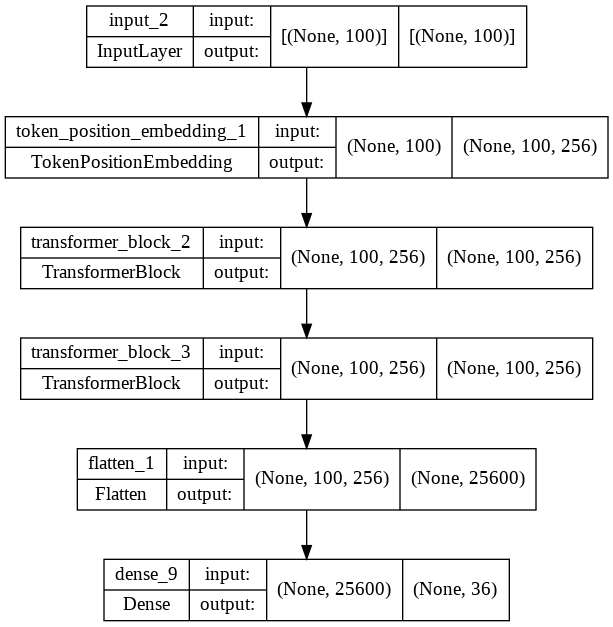

In [63]:
tf.keras.utils.plot_model(my_model,show_shapes=True)


In [52]:

%pwd

'/content'

In [53]:
%ls


drive/  model.png  sample_data/  tv_layer.pkl


In [64]:
checkpoint_filepath = './checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False)

In [65]:
X,y = train_features,train_targets

balanced_accuracy_scores = []
matthews_corrcoef_scores = []
f1_scores = []
conf_matrix_list_of_arrays = []

# prepare cross validation
n=5
seed=1
k_fold = KFold(n_splits=n, random_state=seed, shuffle=True)

for train_index, test_index in k_fold.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  X_train_dtm = vectorize_layer(X_train)
  X_test_dtm = vectorize_layer(X_test)
  history = my_model.fit(X_train_dtm, y_train, verbose=1, epochs=1, callbacks=[model_checkpoint_callback])
  y_pred_class = my_model.predict(X_test_dtm)

  y_pred_class = np.argmax(y_pred_class,axis=1)
  
  conf_matrix = confusion_matrix(y_test, y_pred_class)
  conf_matrix_list_of_arrays.append(conf_matrix)
  
  balanced_accuracy_scores.append(balanced_accuracy_score(y_test, y_pred_class))
  matthews_corrcoef_scores.append(matthews_corrcoef(y_test, y_pred_class))
  f1_scores.append(f1_score(y_test, y_pred_class, average='weighted'))


1030/1032 [============================>.] - ETA: 0s - loss: 5.7413 - sparse_categorical_accuracy: 0.0726

INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


1031/1032 [============================>.] - ETA: 0s - loss: 2.9399 - sparse_categorical_accuracy: 0.1680

INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


1029/1032 [============================>.] - ETA: 0s - loss: 2.5272 - sparse_categorical_accuracy: 0.2446

INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


1030/1032 [============================>.] - ETA: 0s - loss: 2.3060 - sparse_categorical_accuracy: 0.3088

INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


1031/1032 [============================>.] - ETA: 0s - loss: 2.1745 - sparse_categorical_accuracy: 0.3469

INFO:tensorflow:Assets written to: ./checkpoint/assets


INFO:tensorflow:Assets written to: ./checkpoint/assets


1032/1032 [==============================] - 23s 22ms/step - loss: 2.1745 - sparse_categorical_accuracy: 0.3469


In [67]:

balanced_accuracy_scores = np.array(balanced_accuracy_scores)
print('Mean of balanced_accuracy_scores: ', np.mean(balanced_accuracy_scores, axis=0))

Mean of balanced_accuracy_scores:  0.13631879704702884


In [68]:
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print('Mean of conf_matrix: ', mean_of_conf_matrix_arrays)

Mean of conf_matrix:  [[ 7.6  0.   8.2 ...  0.   0.   0. ]
 [ 3.4  0.  34.4 ...  0.   0.   0. ]
 [ 8.8  0.  87.8 ...  0.   0.   0. ]
 ...
 [ 0.   0.   1.6 ...  0.   0.   0. ]
 [ 1.6  0.  11.  ...  0.   0.   0. ]
 [ 0.   0.   0.2 ...  0.   0.   0. ]]


In [69]:
conf_mat = mean_of_conf_matrix_arrays.astype(int)


In [70]:
category_id_df = data[['category', 'category_id']].drop_duplicates()


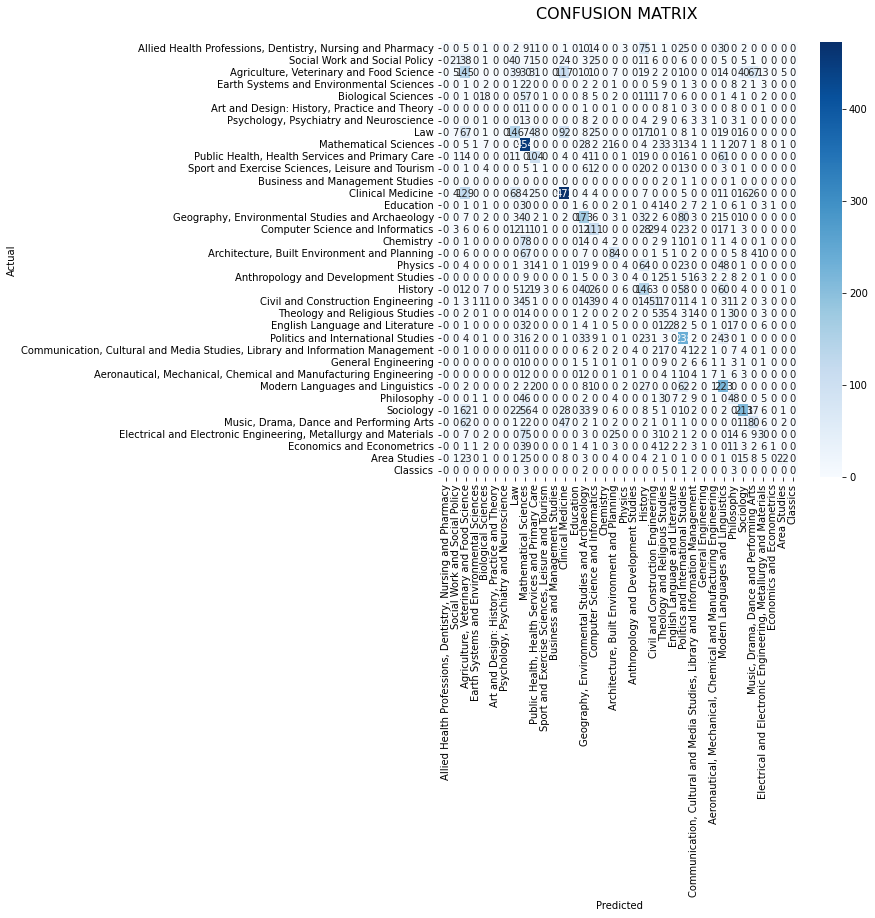

In [60]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.category.values, 
            yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX \n", size=16);

In [61]:
test_features_vc = vectorize_layer(test_features)
y_pred_test = my_model.predict(test_features_vc)
y_pred_test = np.argmax(y_pred_test,axis=1)
 
balanced_accuracy_score_test = balanced_accuracy_score(test_targets, y_pred_test)
print('balanced_accuracy_score_test :',balanced_accuracy_score_test)
matthews_corrcoef_score_test = matthews_corrcoef(test_targets, y_pred_test)
print('matthews_corrcoef_score_test :',matthews_corrcoef_score_test)
f1_score_test = f1_score(test_targets, y_pred_test, average='weighted')
print('f1_score_test :',f1_score_test)

balanced_accuracy_score_test : 0.24982112704580914
matthews_corrcoef_score_test : 0.34356661090672486
f1_score_test : 0.3490130134489943


In [62]:
new_review = "this is a english language literature."
predictions=my_model.predict(vectorize_layer([new_review]))
for pred in predictions:
  print(id_to_category[np.argmax(pred)])

Philosophy


In [65]:
new_review = "this is a civil engineering."
predictions=my_model.predict(vectorize_layer([new_review]))
for pred in predictions:
  print(id_to_category[np.argmax(pred)])

Politics and International Studies
